# 911 Calls Capstone Project

Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading data
df = pd.read_csv('911.csv')

In [3]:
#Checking some information to start with basic EDA of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


We can see here right of the bat that there are some missing values in the columns 'zip', 'twp', 'addr' which could 
later turn out to be important features

In [4]:
#Checking head to try to get a feel of the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Trying to get some insights from the data:

1.Top 5 zip codes for 911 calling

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

2. Top 5 townships for 911 calling

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

No of different title's

In [9]:
df['title'].nunique()

110

## Creating new features

For ease of data visualization later, we need to segregate the reasons for 911 calls from the title column.
So we make a new feature column which stores these reasons

In [7]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [11]:
df.iloc[12]

lat                                                    40.1741
lng                                                   -75.0985
desc         BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...
zip                                                      19040
title                              Traffic: VEHICLE ACCIDENT -
timeStamp                                  2015-12-10 17:40:02
twp                                             UPPER MORELAND
addr                             BYBERRY AVE & S WARMINSTER RD
e                                                            1
Reason                                                 Traffic
Name: 12, dtype: object

Most common reason for a 911 call

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

# Univariate Analysis

1. Reason feature

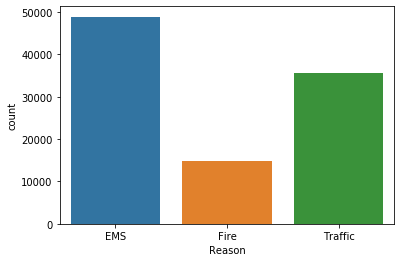

In [13]:
sns.countplot(x='Reason',data = df)

Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [15]:
type(df['timeStamp'].iloc[0])

str

we convert this to to a python timestamp which will make it easier for us to work with this data

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [17]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [18]:
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

In [19]:
dmap = { 0:'Mon' , 1:'Tue' , 2:'Wed' , 3:'Thu' , 4:'Fri' , 5:'Sat' , 6:'Sun' }

In [20]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [21]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed


In [22]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

# Bivariate Analysis

Number of calls Day of week with reason

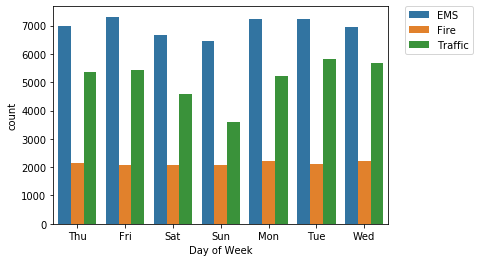

In [24]:
sns.countplot(x = 'Day of Week', data = df , hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Relocating the legend

Calls per month with reason

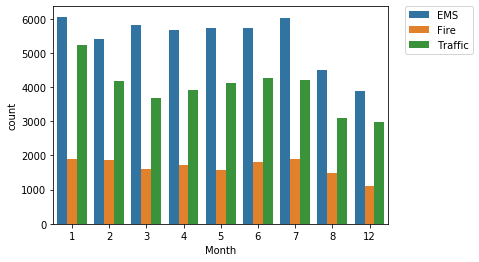

In [22]:
sns.countplot(x = 'Month', data = df, hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We notice here that the data for some months is missing.

Trying to analyse data by month

In [26]:
byMonth = df.groupby('Month').count()
byMonth.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

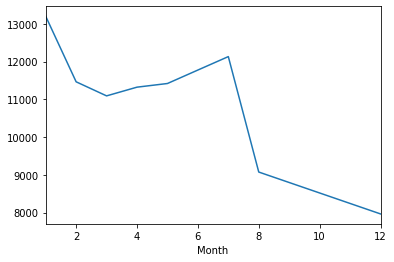

In [27]:
# Could be any column
byMonth['twp'].plot()

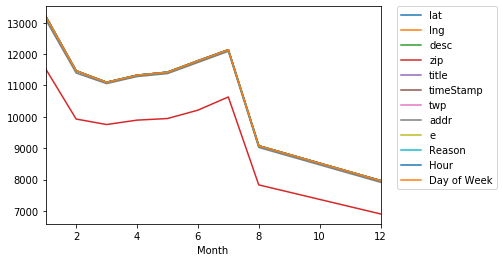

In [28]:
byMonth.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We see here that the number of cases in general decrease as the year proceeds

During mid year, it tends to spike up a bit

# Fitting linear Model

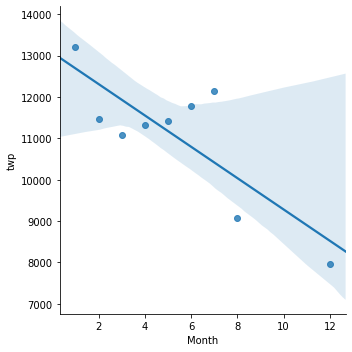

In [29]:
sns.lmplot(x = 'Month', y = 'twp' , data = byMonth.reset_index())

Creating a new 'Date' column from timestamp

In [30]:
df['date'] = df['timeStamp'].apply(lambda t: t.date())

In [31]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed,2016-08-24


Trying to group these dates with count and plotting

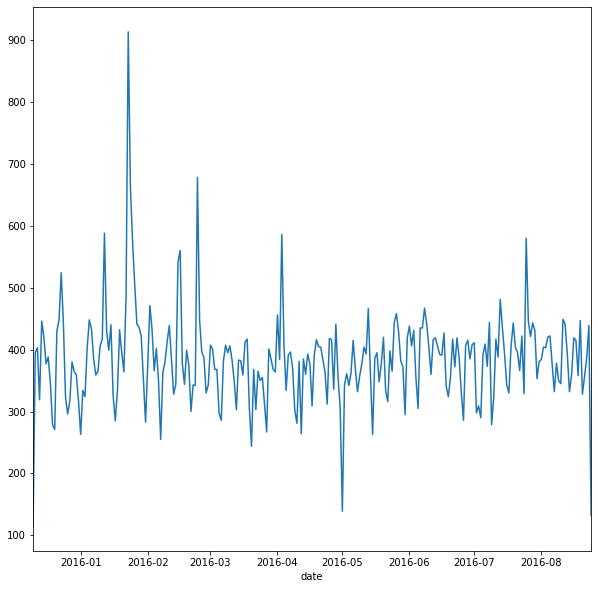

In [37]:
plt.figure(figsize = (10,10))
df.groupby('date').count()['twp'].plot()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

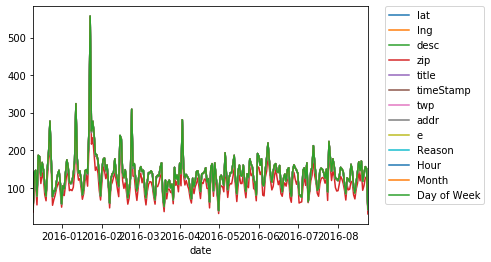

In [40]:
df[df['Reason'] == 'Traffic'].groupby('date').count().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

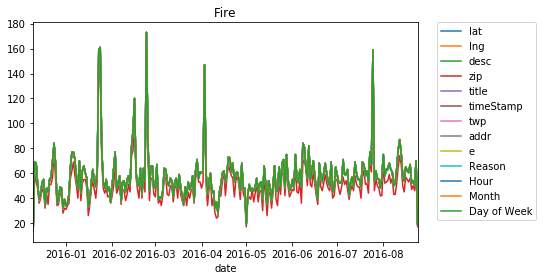

In [41]:
df[df['Reason'] == 'Fire'].groupby('date').count().plot()
plt.title('Fire')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

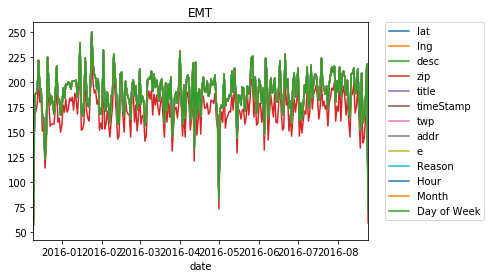

In [42]:
df[df['Reason'] == 'EMS'].groupby('date').count().plot()
plt.title('EMT')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Visualizing Data using heatmaps

In [43]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

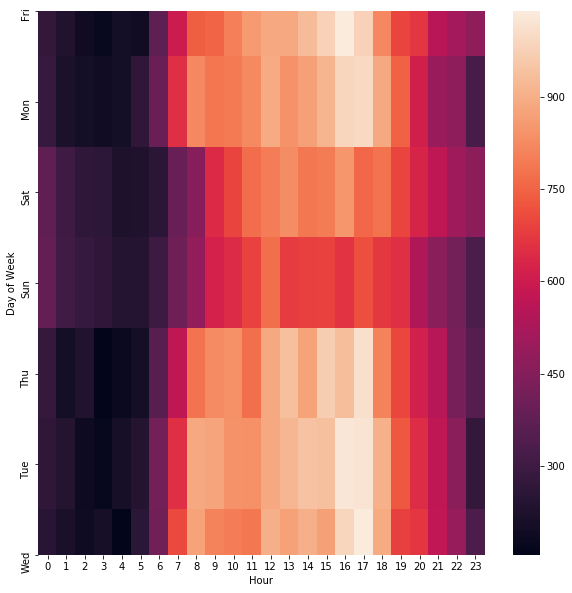

In [45]:
plt.figure(figsize = (10,10))
sns.heatmap(dayHour)

This gives us an apt understanding of the data
1. Most calls are during mid-day
2. Early morning and late night see the leasr calls
3. There are more calls on weekdays than weekends
4. 1600 - 1800 sees the most number of calls suring anyday

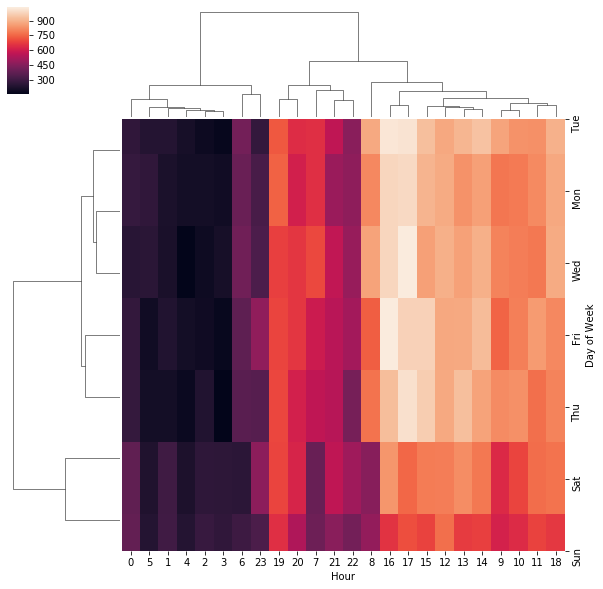

In [48]:
sns.clustermap(dayHour)

Now we will split the data month-wise and then see how the number of calls vary everyday of each month

In [49]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


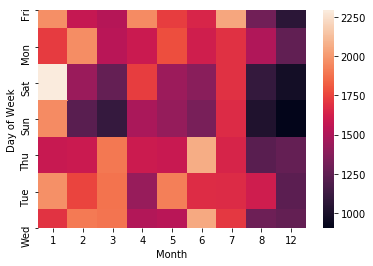

In [50]:
sns.heatmap(dayMonth)

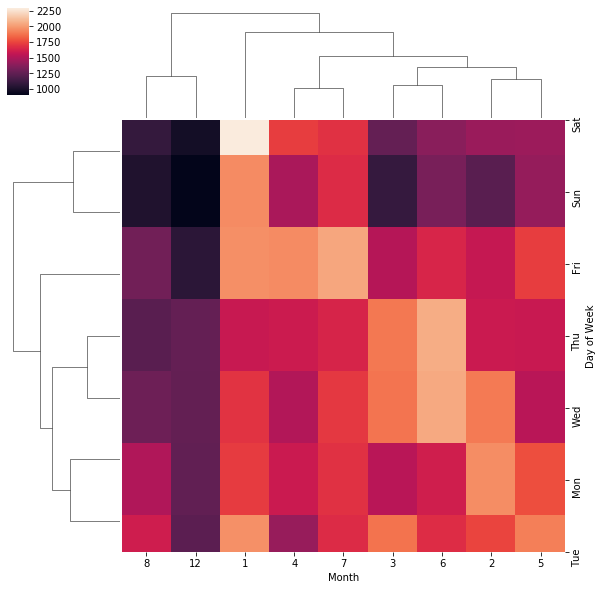

In [51]:
sns.clustermap(dayMonth)

We see that there's a general trend that the calls decrease as the year proceeds.

And we see that on the saturday of january saw the highest spike in the 911 calls

The data we're working with ranges from december of 2015 to the Jan of 2016. As 1st jan 2016 was a friday, it could be 
possible that a huge number of calls were made on the saturday(2nd jan) as this is a holiday season where there are a lot
of potential firecrackers being used, people coming together so houses empty could result in someone breaking in etc.
This could be a cause of a sudden spike in number of calls on the Saturday of January but Saturday of other months see an
average number of calls


With the help of this dataset, we did a bit of analysis using some basic tools and saw how powerful these simple toold can be
and how deep we can get into the dataset by using them and find out so much